# Test Report
### 评估和选择
随机生成一张图作为baseline。
每张候选图都计算 DreamSim 距离，dist_to_ref < baseline_dist 就判为胜（更贴近 reference），然后从 batch 里选最小距离的图；只有更优才更新 baseline。
### Conclusion
“两张图比一张”的选择逻辑本身是稳定的（规则一致、输出与规则匹配），但每个 epoch 的最佳距离是会抖动的

但是人类感知的选择是否稳定不好评估，因为会出现baseline和candidate和ref都不相似

# 稳定性测试

### Test1：Ref=Bseline

每一轮都选择baseline，无进化

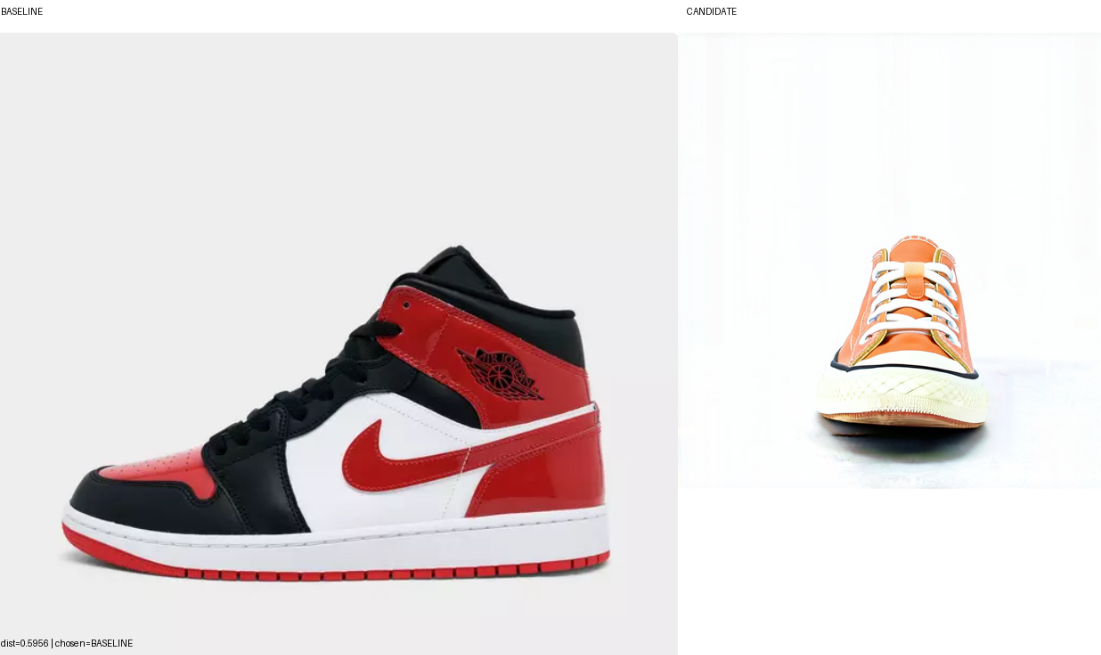


### Test2：Ref!=Baseline
先看表格， Baseline Dist 不会增加，说明在逐渐收敛
| Epoch | Mean Dist | Median Dist | Std Dist | Baseline Dist | Best Dist | Win Rate Candidate |
|------:|----------:|------------:|---------:|--------------:|----------:|-------------------:|
| 1 | 0.64145076 | 0.64587933 | 0.05635433 | 0.55776572 | 0.55776572 | 0.25 |
| 2 | 0.58125359 | 0.58442074 | 0.00931467 | 0.55776572 | 0.56593025 | 0.00 |
| 3 | 0.62583178 | 0.61983091 | 0.06307282 | 0.55674112 | 0.55674112 | 0.25 |
| 4 | 0.62861612 | 0.64458156 | 0.02939532 | 0.55674112 | 0.57779026 | 0.00 |
| 5 | 0.67700228 | 0.65340325 | 0.12671722 | 0.54272836 | 0.54272836 | 0.25 |
| 6 | 0.69305888 | 0.71109208 | 0.05190079 | 0.54272836 | 0.60942113 | 0.00 |
| 7 | 0.61207052 | 0.59469756 | 0.07971057 | 0.52148032 | 0.52148032 | 0.25 |
| 8 | 0.64675805 | 0.63729548 | 0.05722478 | 0.52148032 | 0.58207715 | 0.00 |

每次2张选一张的情况：
| Epoch | Pair | Dist | Baseline | y |
|------:|-----:|------:|---------:|--:|
| 1 | 0 | 0.71627867 | 0.62292111 | 0 |
| 1 | 1 | 0.65142989 | 0.62292111 | 0 |
| 1 | 2 | 0.64032876 | 0.62292111 | 0 |
| 1 | 3 | 0.55776572 | 0.62292111 | 1 |
| 2 | 0 | 0.58680642 | 0.55776572 | 0 |
| 2 | 1 | 0.56593025 | 0.55776572 | 0 |
| 2 | 2 | 0.59024262 | 0.55776572 | 0 |
| 2 | 3 | 0.58203506 | 0.55776572 | 0 |
| 3 | 0 | 0.66721869 | 0.55776572 | 0 |
| 3 | 1 | 0.70692420 | 0.55776572 | 0 |
| 3 | 2 | 0.55674112 | 0.55776572 | 1 |
| 3 | 3 | 0.57244313 | 0.55776572 | 0 |
| 4 | 0 | 0.64635062 | 0.55674112 | 0 |
| 4 | 1 | 0.57779026 | 0.55674112 | 0 |
| 4 | 2 | 0.64281249 | 0.55674112 | 0 |
| 4 | 3 | 0.64751112 | 0.55674112 | 0 |
| 5 | 0 | 0.57544935 | 0.55674112 | 0 |
| 5 | 1 | 0.85847425 | 0.55674112 | 0 |
| 5 | 2 | 0.73135716 | 0.55674112 | 0 |
| 5 | 3 | 0.54272836 | 0.55674112 | 1 |
| 6 | 0 | 0.73190159 | 0.54272836 | 0 |
| 6 | 1 | 0.74063021 | 0.54272836 | 0 |
| 6 | 2 | 0.60942113 | 0.54272836 | 0 |
| 6 | 3 | 0.69028258 | 0.54272836 | 0 |
| 7 | 0 | 0.61586052 | 0.54272836 | 0 |
| 7 | 1 | 0.57353461 | 0.54272836 | 0 |
| 7 | 2 | 0.52148032 | 0.54272836 | 1 |
| 7 | 3 | 0.73740661 | 0.54272836 | 0 |
| 8 | 0 | 0.73036408 | 0.52148032 | 0 |
| 8 | 1 | 0.58207715 | 0.52148032 | 0 |
| 8 | 2 | 0.66684234 | 0.52148032 | 0 |
| 8 | 3 | 0.60774863 | 0.52148032 | 0 |

具体例子.Epoc4, pair_01, 由上表可知， candidate=0.57779026， baseline=0.55674112，选择的是baseline ：

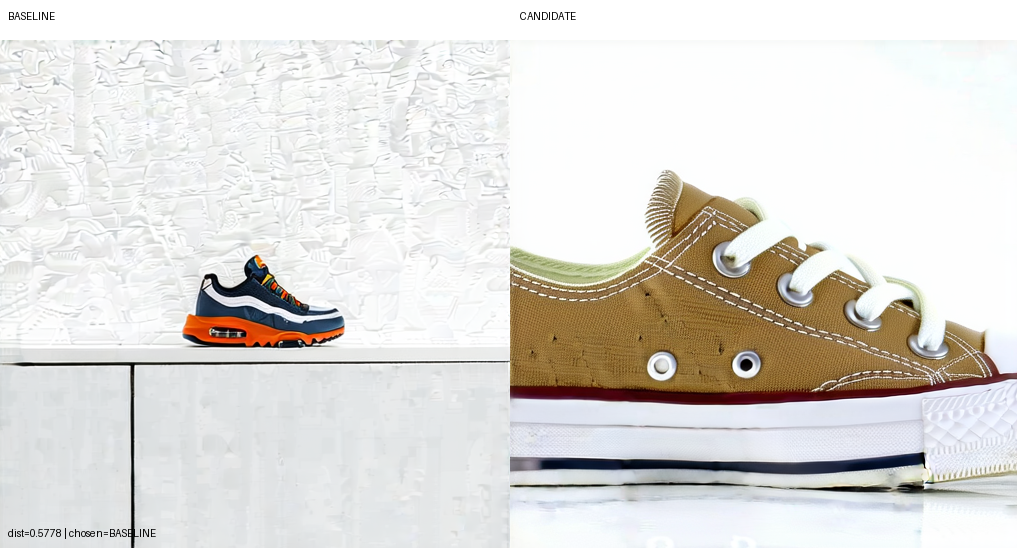

这里的ref是：

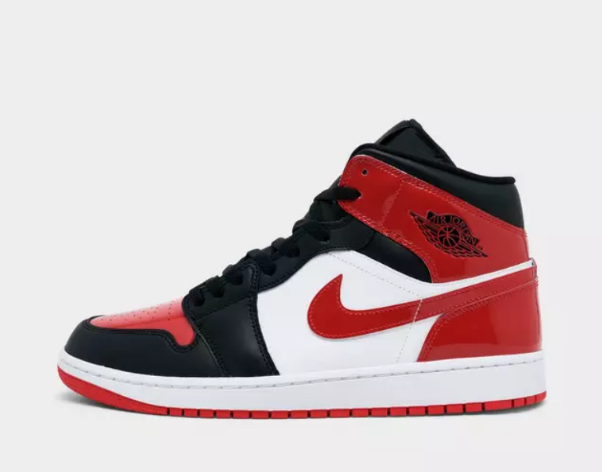

randomly generated baseline：

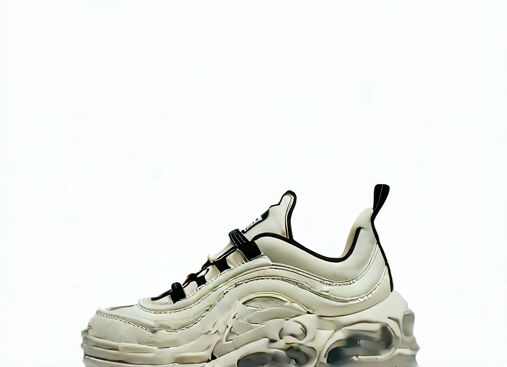

Convergence plot：

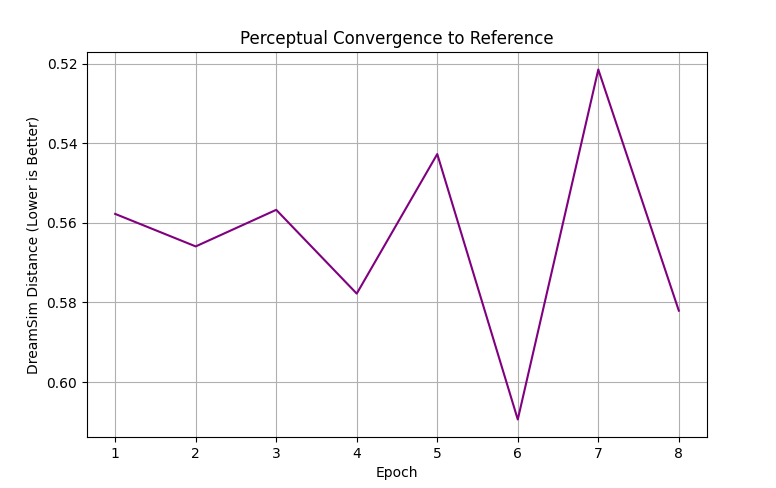

# Convergence plot 不好收敛

### test3， 保持和test2 相同的ref， 和seed去生成的 baseline，把bacth拉到100：
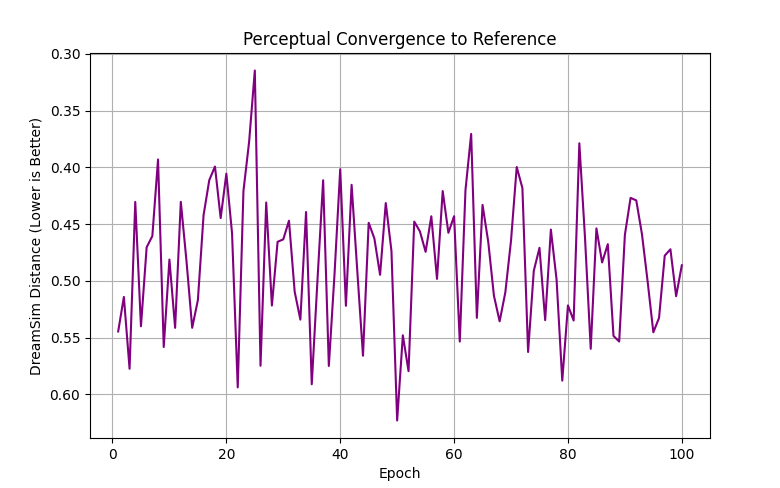

这里最后提升的结果：

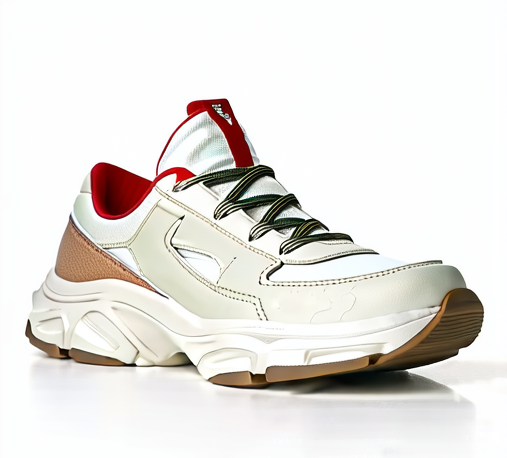

### test4， 随机生成一批K个图，让Dreamsim先打分一轮，选一张做baseline, ref和 test2保持一致。 这里k=16

baseline 如下：

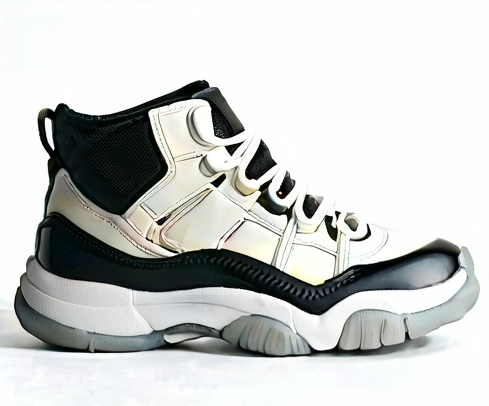

convergence情况：

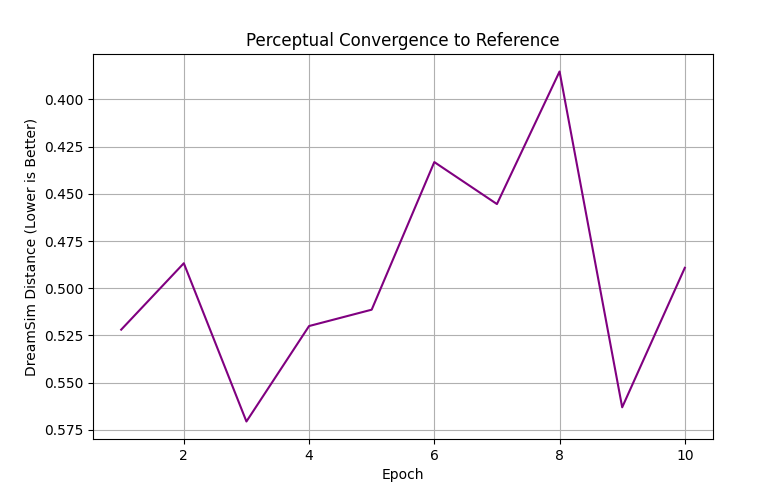

### test5， 选定baseline和ref

Baseline：

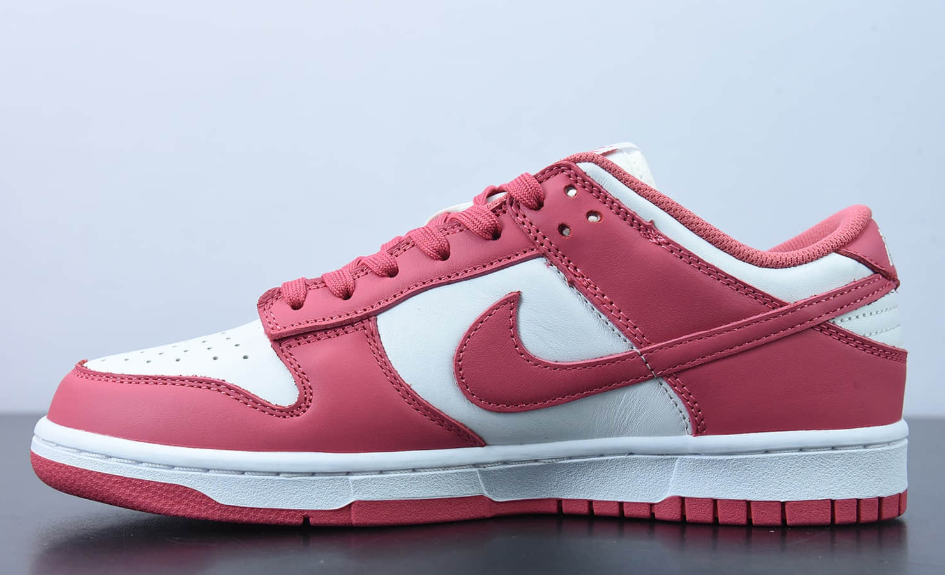

Ref:

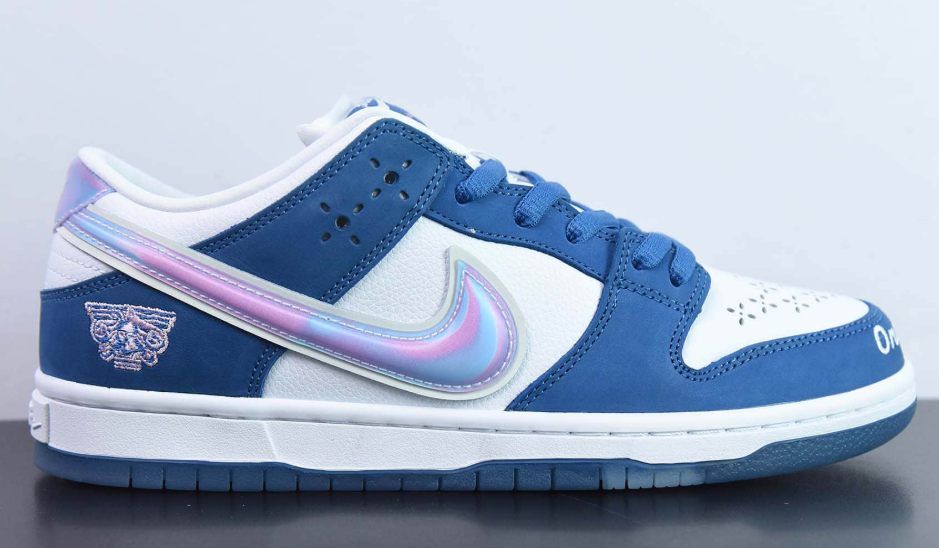


选择情况：

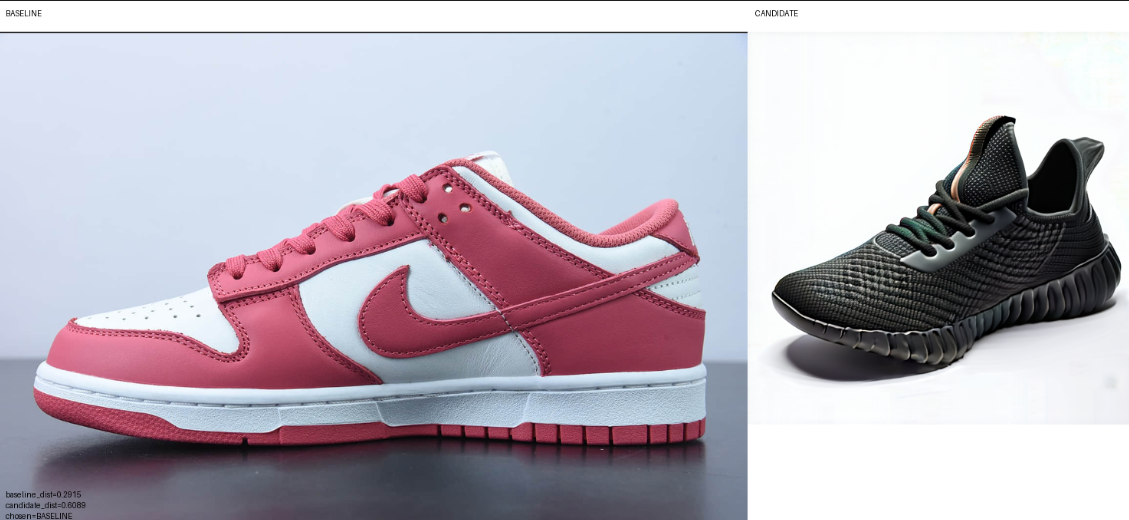

convergence依旧是上下抖动

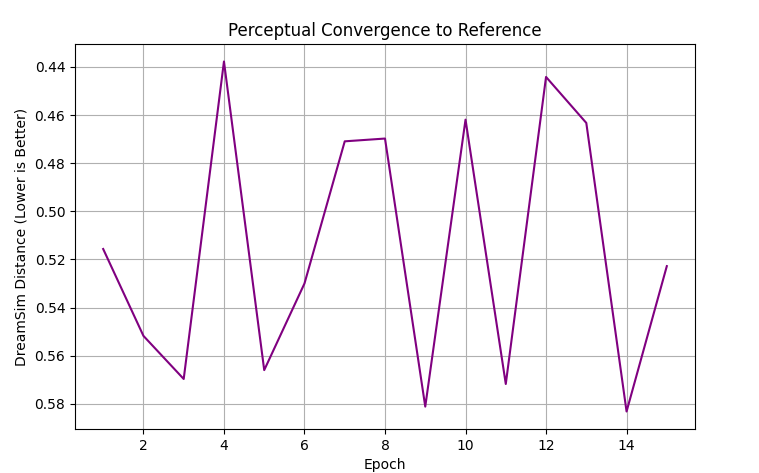
